# HCV Data Analysis

In [2130]:
from google.colab import drive
drive.mount("gdrive")

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


## Import necessary libraries

In [2131]:
#utils and plot libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

#machine learn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

## Read the dataset

In [2132]:
df = pd.read_csv("/content/gdrive/My Drive/DataAnalysis/HCV/hcvdat0.csv")

In [2133]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Meta analysis regarding to the dataset

In [2134]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.
1. X (Patient ID/No.)
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3. Age (in years)
4. Sex (f,m)
5. ALB
6. ALP
7. ALT
8. AST
9. BIL
10. CHE
11. CHOL
12. CREA
13. GGT
14. PROT

In [2135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


It can be observed that there are NaN values existing in our dataset which needs to be handled.

## Data Cleansing

In [2136]:
for col in df.columns:
  print(col,"contains:",df[col].isnull().sum())

Unnamed: 0 contains: 0
Category contains: 0
Age contains: 0
Sex contains: 0
ALB contains: 1
ALP contains: 18
ALT contains: 1
AST contains: 0
BIL contains: 0
CHE contains: 0
CHOL contains: 10
CREA contains: 0
GGT contains: 0
PROT contains: 1


In [2137]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [2138]:
category_dict = {
    '0=Blood Donor':0, '0s=suspect Blood Donor':1, '1=Hepatitis':2,
       '2=Fibrosis':3, '3=Cirrhosis':4
}
df.Category = df.Category.map(category_dict)
sex_dict = {
    'm':0,
    'f':1
}
df.Sex = df.Sex.map(sex_dict)
imputer = KNNImputer(n_neighbors=3)
new = pd.DataFrame(data=imputer.fit_transform(df),columns=df.columns)

In [2139]:
new.head(-1)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1.0,0.0,32.0,0.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2.0,0.0,32.0,0.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3.0,0.0,32.0,0.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4.0,0.0,32.0,0.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5.0,0.0,32.0,0.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,610.0,4.0,59.0,1.0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611.0,4.0,62.0,1.0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612.0,4.0,64.0,1.0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613.0,4.0,64.0,1.0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0


In [2140]:
for col in new.columns:
  print(col,"contains:",new[col].isnull().sum())

Unnamed: 0 contains: 0
Category contains: 0
Age contains: 0
Sex contains: 0
ALB contains: 0
ALP contains: 0
ALT contains: 0
AST contains: 0
BIL contains: 0
CHE contains: 0
CHOL contains: 0
CREA contains: 0
GGT contains: 0
PROT contains: 0


Dataset is clean now.

## EDA

First thing to check regarding on the dataset is the balance.

In [2141]:
new.Category.value_counts()

0.0    533
4.0     30
2.0     24
3.0     21
1.0      7
Name: Category, dtype: int64

The classes are exteremely unbalanced and due to the the number of instances is low this condition will cause almost any model to work wrong.

In [2142]:
category_dict

{'0=Blood Donor': 0,
 '0s=suspect Blood Donor': 1,
 '1=Hepatitis': 2,
 '2=Fibrosis': 3,
 '3=Cirrhosis': 4}

What we are trying to do is actually manage to identify whether a patient has hepatitis or not.We can manipulate data in a manner that can show a better performance or our models will show great accuracy but very low ability to identify HCV.


In [2143]:
category_dict = {
  0:0,
  1:0,
  2:1,
 3:1,
 4:1
}

In [2144]:
new["Category"] = new["Category"].map(category_dict)

We have changed the task of classification from multi-class to binary and resulted our models to have enough performance now lets check if we can increase it more.

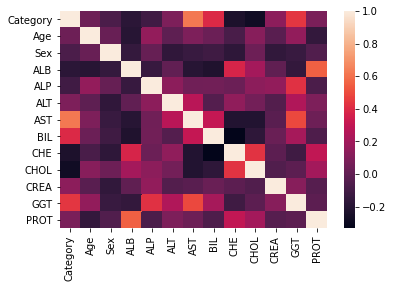

In [2145]:
sns.heatmap(new.drop(columns=["Unnamed: 0"]).corr())


Some enzymes and proteins shows correlation between but this is an expected situation , we will try to dig deeper in order to find any relation which can help us in model training.

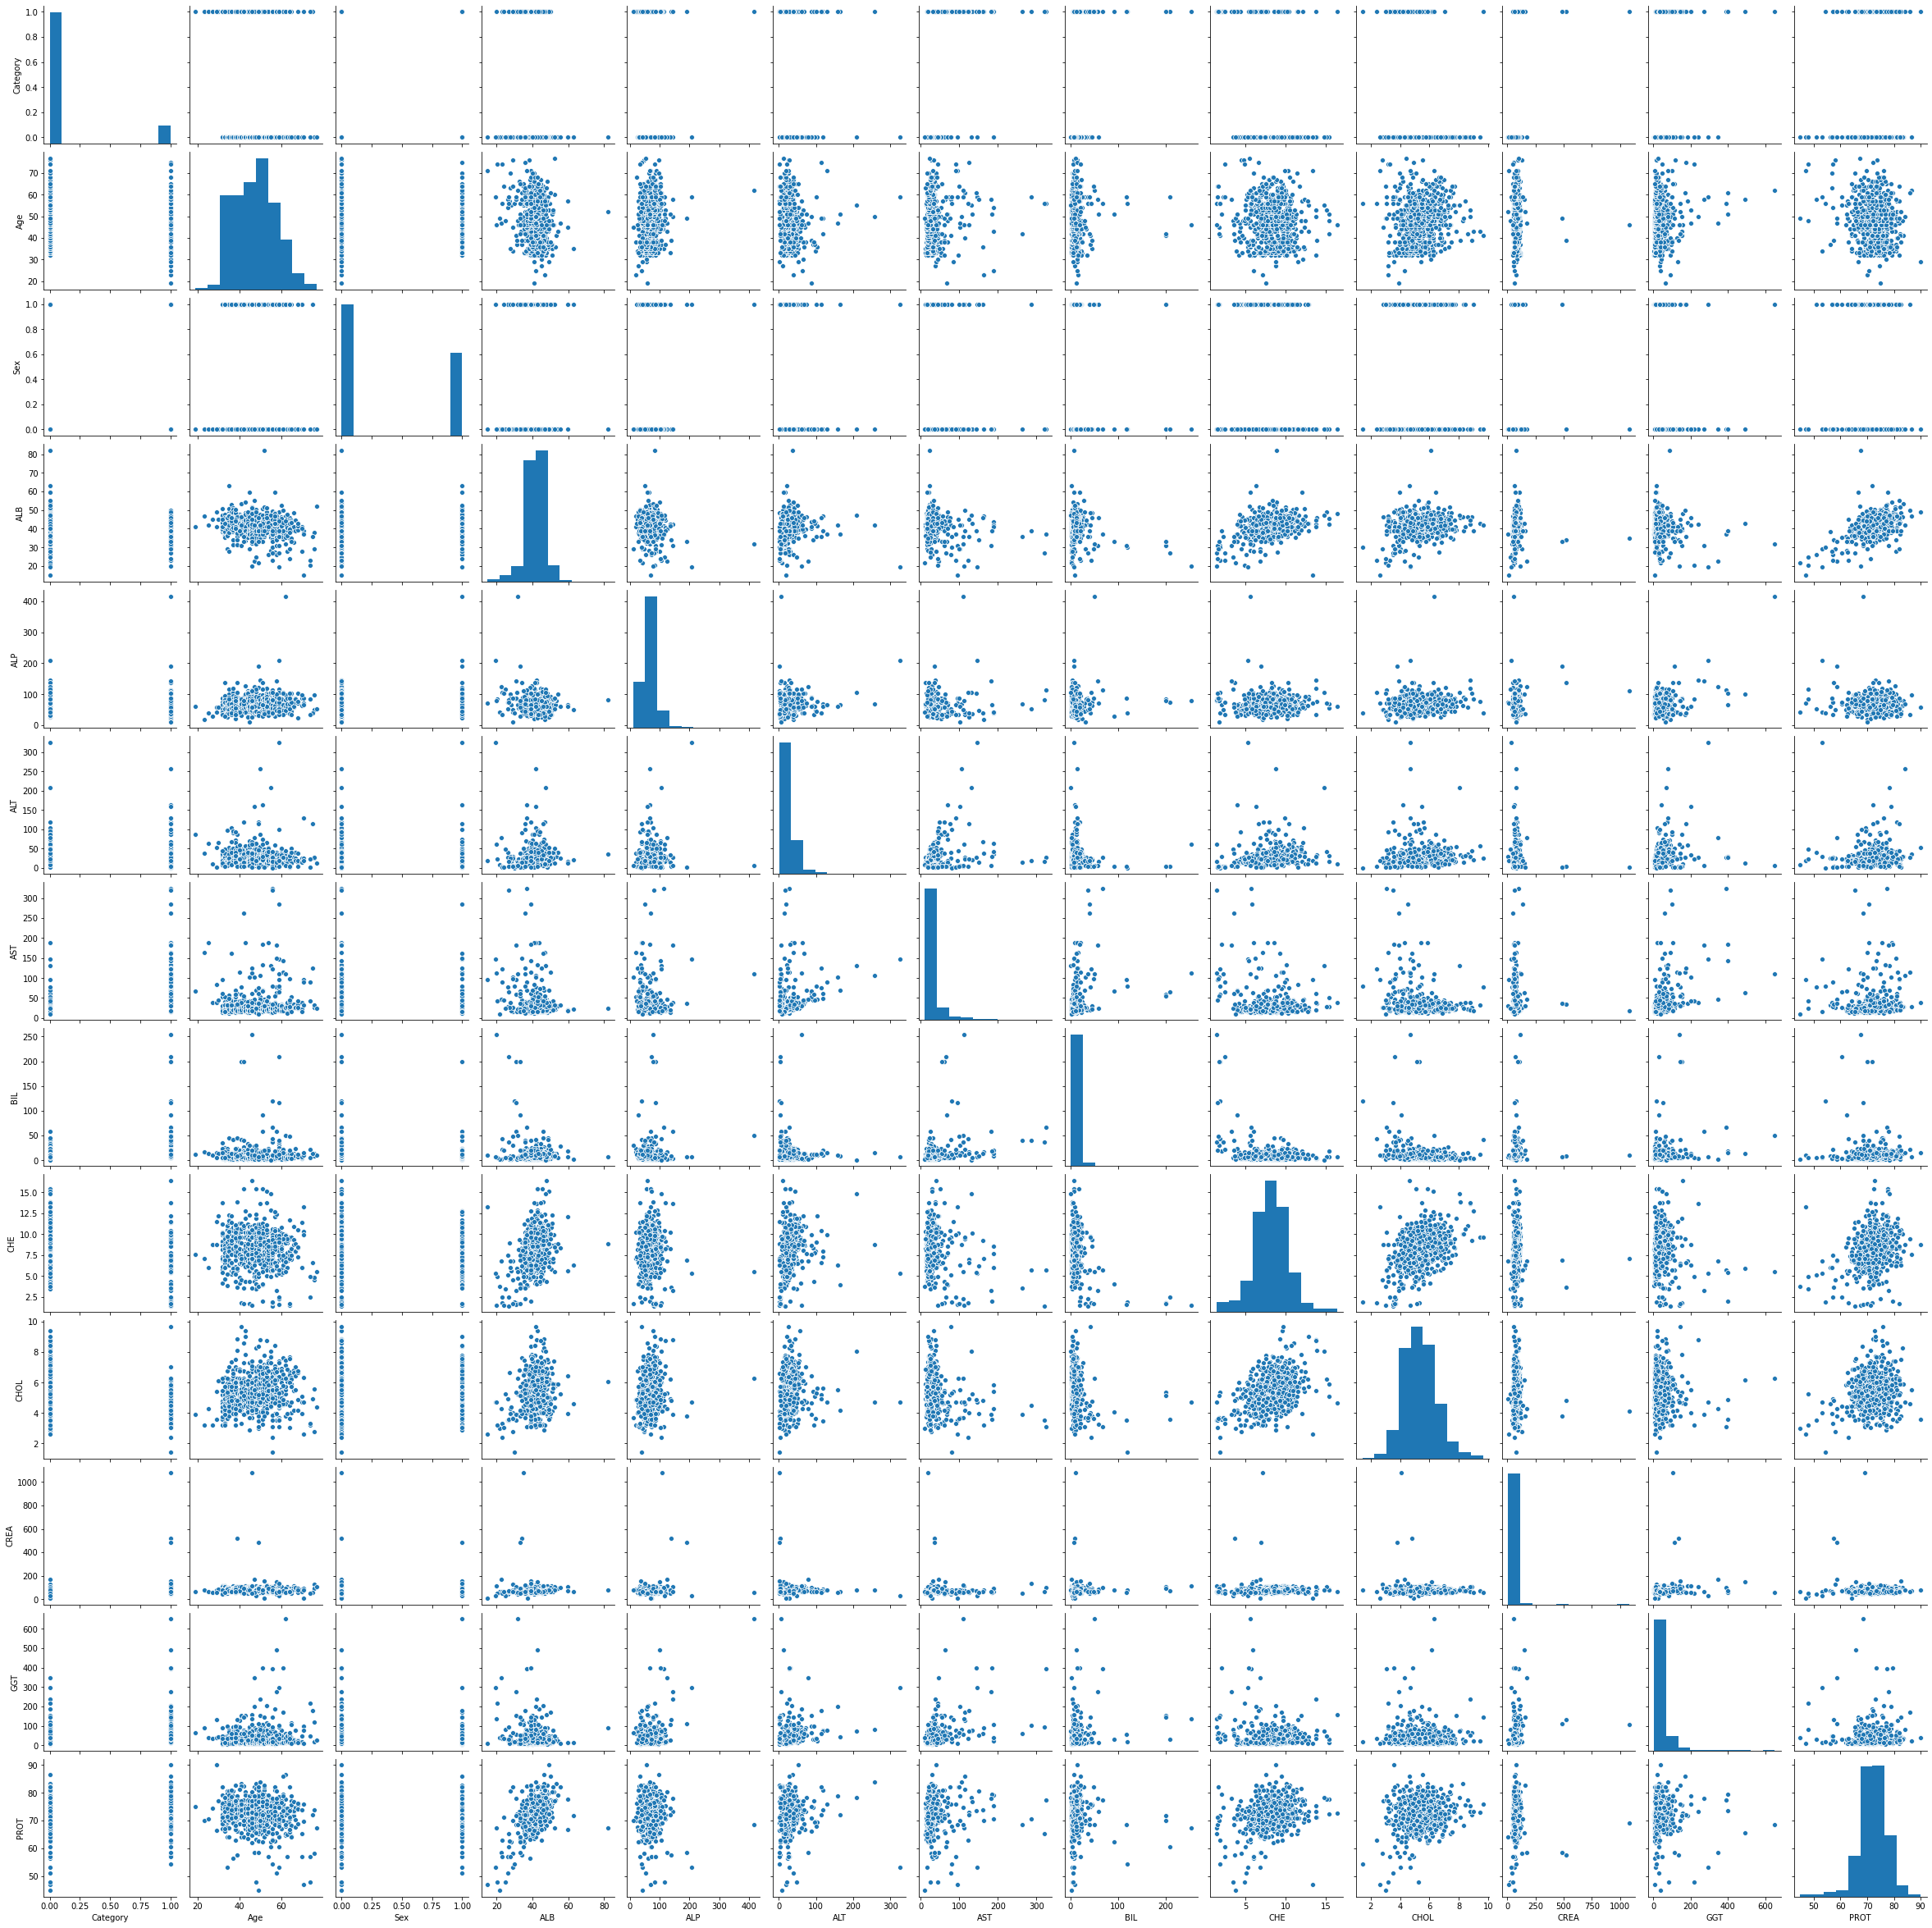

In [2166]:
sns.pairplot(data=new)

EDA was a cheap shot in this analysis since most of the data in here contains natural correlation in between which is not a pattern to follow deeply.

## Data Preprocessing

* Scaling
* One-Hot Encoding

Before starting to get into the real pre-processing lets eliminate the Unnmaed:0 field since it is useless.

In [2148]:
new = new.drop(columns=["Unnamed: 0"])
new.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32.0,0.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32.0,0.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32.0,0.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32.0,0.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32.0,0.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Before starting to normalize , lets extract categorical fields since it is not the best practice to normalize them too.

In [2150]:
cat_fields = new[["Category","Sex"]]
non_cat_fields = new.drop(columns=["Category","Sex"])

Standard scaler showed better performance compared to MinMax scaler which is why it is used.

In [2152]:
# fit scaler on training data
norm = StandardScaler().fit_transform(non_cat_fields)

In [2153]:
non_cat_fields = pd.DataFrame(norm,columns=non_cat_fields.columns)

One-Hot Encoding before concatenating the categorical data with continious data.

In [2156]:
cat_fields = pd.get_dummies(cat_fields)
for col in cat_fields.columns:
  non_cat_fields[col] = cat_fields[col]

In [2158]:
counter=0
for index, row in non_cat_fields.iterrows():
    if row['Category'] == 0 and counter<100:
        non_cat_fields.drop(index, inplace=True)
        counter+=1

Train Test Data Split with Test Size 0.33 and Random State = 42

In [2159]:
X_train,X_test,y_train,y_test = train_test_split(non_cat_fields.drop(columns=["Category"]),non_cat_fields["Category"],test_size=0.33,random_state=42)

In order to compare a default classifier is used without even making any CV.

In [2160]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9411764705882353

Model has a high accuracy score but since the dataset is unbalanced,we can not trust accuracy score,other performance metrics needs to be considered.

In [2161]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       140
           1       0.88      0.77      0.82        30

    accuracy                           0.94       170
   macro avg       0.92      0.87      0.89       170
weighted avg       0.94      0.94      0.94       170



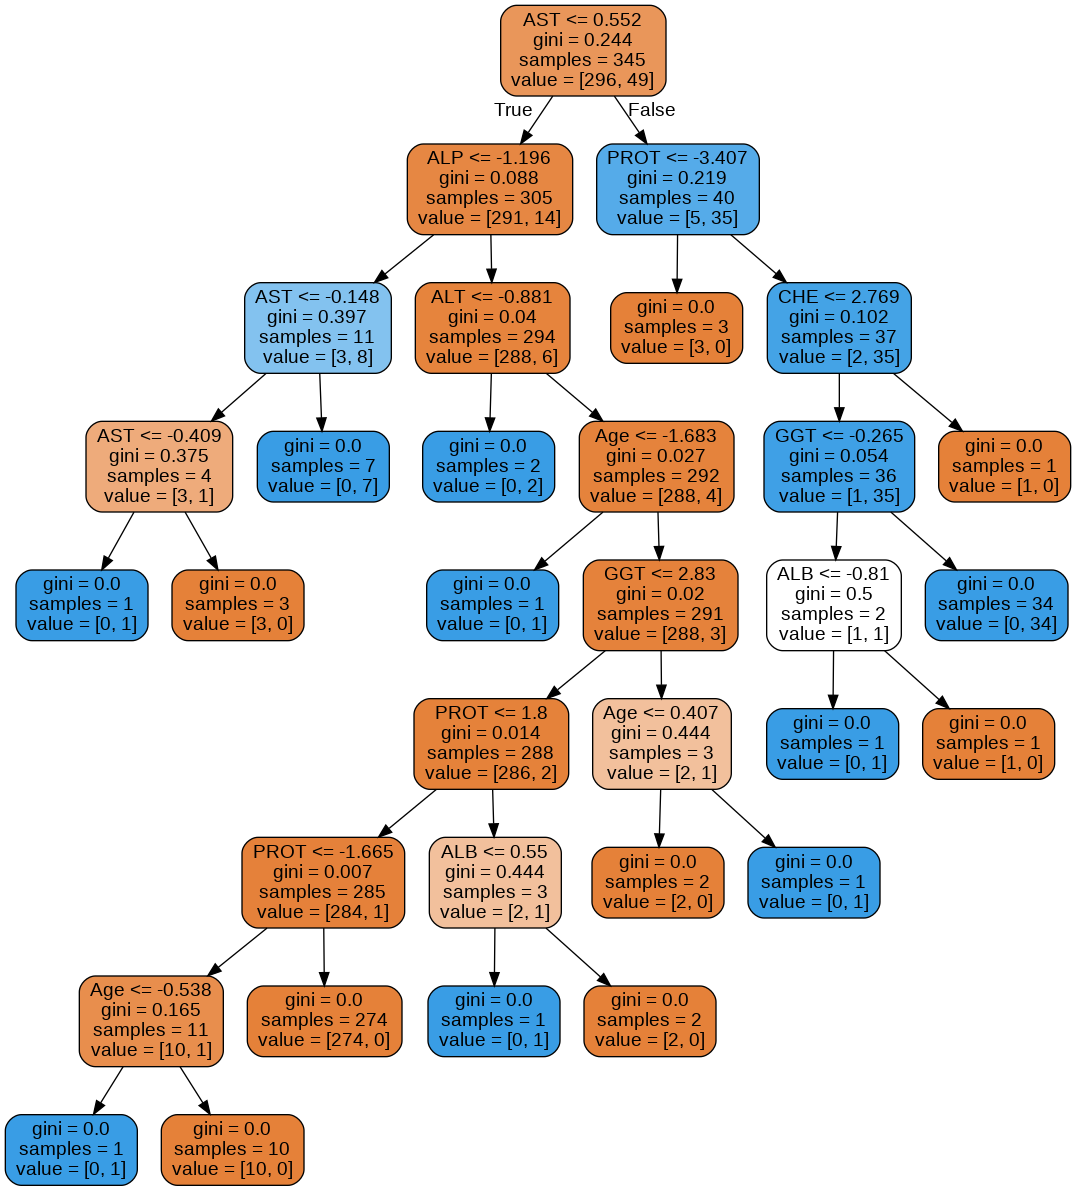

In [2162]:
from IPython.display import Image
import pydot
import pydotplus

out_file = tree.export_graphviz(
    clf,
    feature_names   = X_train.columns,
    filled          = True,
    rounded         = True
)
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())

## ANN for binary classification 

In [2163]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(12,)))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [2164]:
model.fit(X_train,y_train,epochs=30,batch_size=1)


Epoch 1/30
345/345 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.9101
Epoch 2/30
345/345 [==============================] - 0s 923us/step - loss: 0.1683 - accuracy: 0.9449
Epoch 3/30
345/345 [==============================] - 0s 938us/step - loss: 0.1134 - accuracy: 0.9652
Epoch 4/30
345/345 [==============================] - 0s 970us/step - loss: 0.0867 - accuracy: 0.9768
Epoch 5/30
345/345 [==============================] - 0s 958us/step - loss: 0.0692 - accuracy: 0.9826
Epoch 6/30
345/345 [==============================] - 0s 992us/step - loss: 0.0594 - accuracy: 0.9855
Epoch 7/30
345/345 [==============================] - 0s 960us/step - loss: 0.0484 - accuracy: 0.9942
Epoch 8/30
345/345 [==============================] - 0s 946us/step - loss: 0.0424 - accuracy: 0.9942
Epoch 9/30
345/345 [==============================] - 0s 961us/step - loss: 0.0361 - accuracy: 0.9942
Epoch 10/30
345/345 [==============================] - 0s 948us/step - loss: 0.0294 

In [2165]:
print(classification_report(model.predict_classes(X_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       146
           1       0.88      0.96      0.92        24

    accuracy                           0.98       170
   macro avg       0.94      0.97      0.95       170
weighted avg       0.98      0.98      0.98       170

